In [1]:
import librosa as l
import math 
import json 
import os 
import numpy as np

In [2]:
DATASET_PATH ='./data/'
SAMPLE_RATE = 16000
JSON_PATH = "./nfcc_13_len=30M_dasatset_1_a_5.json"

In [3]:
dic_lab = {
    "Benn": 0,
    "Ñaar": 1,
    "Ñett": 2,
    "Ñent": 3,
    "Juróom": 4, 
}

In [4]:
os.listdir(DATASET_PATH)

['1_Benn', '2_Ñaar', '3_Ñett', '4_Ñent', '5_Juróom']

In [9]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [], 
        "labels": [],
        "mfcc": []
    }


    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        
        print(i)
        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:
          
            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            #print("\nProcessing: {}".format(semantic_label))
            j = 0
            # process all audio files in genre sub-dir
            for f in filenames:
                j = j + 1
                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = l.load(file_path, sr=SAMPLE_RATE)
                print(file_path , " ---  ", j)
                #print(dico[str(semantic_label)])
                signal2 = np.zeros(3000)
                if len(signal) >= 3000:
                    signal2 = signal[:3000]
                else:
                    signal2[0:len(signal)] = signal     
                print("shape de signal 2:", signal2.shape)
        
                # extract mfcc
                mfcc = l.feature.mfcc(signal2 , sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                mfcc = mfcc.T

                # store only mfcc feature with expected number of vectors

                data["mfcc"].append(mfcc.tolist())
                data["labels"].append(i-1)
            
    print(data["mapping"])
    print(data["labels"])
            

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)  


In [11]:
#save_mfcc(DATASET_PATH , JSON_PATH)

In [8]:
dirpath = "/home/ibrahimabarry01/Desktop/memoire_test_1/data/2_gnari/"
f = "958_clean.wav"
SAMPLE_RATE = 22050
num_mfcc = 20

bien ...


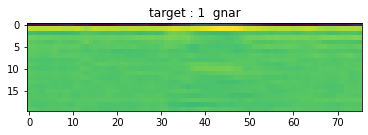

In [20]:
# data est un dictionnaire ou nous allons stoquer nos donnees (input et target) 
# apres nous convertirons data en fichier json   
data = {
    'mfcc': [],
    'labels': [],
}
# dirpath est le chemin vers le fichier audio ex: ./benn/ , ./gnar/ etc ...
# f est le nom du fichier audio : 10001.wav , 10002.wav etc ...
# librosa.load() est une fonction qui permet de charger en memoire de l'audio
# librosa.load() prend en parametre deux elements qui sont le chemin file_path et 
# SAMPLE_RATE ou fréquence d'échantillonnage dans notre cas le frequence est de 22050
file_path = os.path.join(dirpath, f)
signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
# extraction de caractéristique mfcc
# librosa.feature.mfcc permet extraire le mfcc d'un fichier audio
# il prend comme argument le nom de mfcc (n_mfcc) qui n'est rien d'autre que le nombre 
# de coeficient a extraire. 
mfcc = librosa.feature.mfcc(signal , sr , n_mfcc=num_mfcc) 
# ensuite on sauvegarde mfcc dans data et comme c'est le cas de gnar target = 1 
# si c'etait benn target = 0
data["mfcc"].append(mfcc.tolist())
data["labels"].append(1)
plt.title("target : 1  gnar")
plt.imshow(mfcc)
# on sauvegarde data dans fichier_json
with open("fichier_json", "w") as fp:
        json.dump(data, fp, indent=4)
        print("bien ...")